In [102]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [103]:
df_preis = pd.read_csv("Preiselastizität.csv", sep = ";")
df_preis.dropna()

,date,c_class_average_price,unit_c,E_class_average_price,unit_e,s_class_average_price,unit_s,cl_class_average_price,unit_cl,sl_class_average_price,unit_sl,m_class_average_price,unit_m
0,mag-06,38917,4329.0,61420,4070.0,101100,2526.0,132050,46.0,134225,1056.0,44900,2278.0
1,giu-06,38917,4250.0,61420,4213.0,101100,2407.0,132050,63.0,134225,866.0,44900,2601.0
2,lug-06,38917,5285.0,61420,4479.0,101100,2233.0,132050,52.0,134225,768.0,44900,2446.0
3,ago-06,38917,4652.0,61420,3955.0,101100,2427.0,132050,54.0,134225,713.0,44900,2312.0
4,set-06,38917,4238.0,61420,4112.0,101100,2357.0,132050,41.0,134225,557.0,44900,2706.0
5,ott-06,38917,3784.0,61420,4895.0,101100,2518.0,132050,98.0,134225,554.0,44900,2770.0
6,nov-06,38917,4435.0,61420,4918.0,101100,2780.0,132050,391.0,134225,456.0,44900,3183.0
7,dic-06,38917,5197.0,61420,7116.0,101100,2987.0,132050,347.0,134225,539.0,44900,3889.0
8,gen-07,36650,3928.0,63443,3375.0,124750,2078.0,122825,258.0,136175,369.0,56040,2351.0
10,mar-07,36650,4486.0,63443,4019.0,124750,2440.0,122825,295.0,136175,670.0,56040,2619.0


In [104]:
df_c = pd.DataFrame(data = {"Price" : df_preis["c_class_average_price"], "units":df_preis["unit_c"]})
df_e = pd.DataFrame(data = {"Price" : df_preis["E_class_average_price"], "units":df_preis["unit_e"]})
df_s = pd.DataFrame(data = {"Price" : df_preis["s_class_average_price"], "units":df_preis["unit_s"]})
df_cl = pd.DataFrame(data = {"Price" : df_preis["cl_class_average_price"], "units":df_preis["unit_cl"]})
df_sl = pd.DataFrame(data = {"Price" : df_preis["sl_class_average_price"], "units":df_preis["unit_sl"]})
df_m = pd.DataFrame(data = {"Price" : df_preis["m_class_average_price"], "units":df_preis["unit_m"]})

In [105]:
dfs = {
    "C": df_c.groupby("Price").mean(),
    "E": df_e.groupby("Price").mean(),
    "S": df_s.groupby("Price").mean(),
    "CL": df_cl.groupby("Price").mean(),
    "SL": df_sl.groupby("Price").mean(),
    "M": df_m.groupby("Price").mean(),
}

In [106]:
E = {}
keys = ["C", "E", "S", "CL", "SL", "M"]
for k in dfs:
    prices = dfs[k].index
    units = dfs[k].values
    elast = np.zeros(len(prices)-1)
    for j in range(len(prices)-1):
        q = (units[j+1] - units[j]) / units[j]
        p = (prices[j+1] - prices[j]) / prices[j]
        elast[j] = q/p
    E[k] = elast
E

{'C': array([ 2.58119572, -3.79008944]),
 'E': array([-14.92948863,  23.17933799, -21.88044984]),
 'S': array([ -0.58202067, -11.31263115, -17.84593941]),
 'CL': array([-7.47997929, -0.15709903,  4.30363683]),
 'SL': array([ -16.61795849, -204.47924326,  -19.7018619 ]),
 'M': array([ -0.04505608,  20.81650657, -18.00307892])}

In [110]:
traces = [0]*len(keys)
for i in range(len(keys)):
    traces[i] = go.Scatter(x = dfs[keys[i]]["units"], y = E[keys[i]], mode = "markers", name = keys[i])

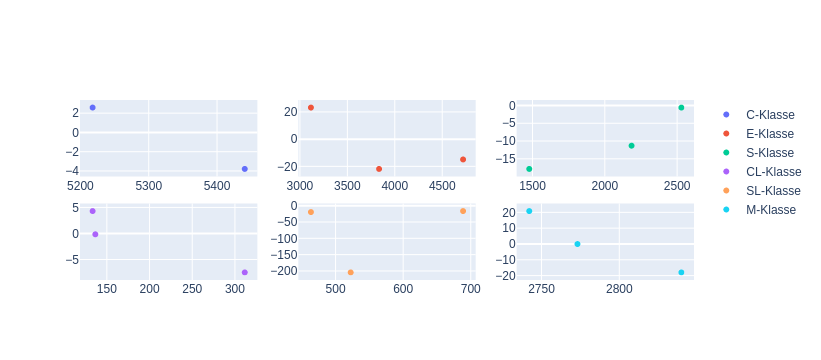

In [113]:
fig = make_subplots(rows = 2, cols = 3)
fig.add_trace(go.Scatter(x = dfs["C"]["units"], y = E["C"], mode = "markers", name = "C-Klasse"), row = 1, col = 1)
fig.add_trace(go.Scatter(x = dfs["E"]["units"], y = E["E"], mode = "markers", name = "E-Klasse"), row = 1, col = 2)
fig.add_trace(go.Scatter(x = dfs["S"]["units"], y = E["S"], mode = "markers", name = "S-Klasse"), row = 1, col = 3)
fig.add_trace(go.Scatter(x = dfs["CL"]["units"], y = E["CL"], mode = "markers", name = "CL-Klasse"), row = 2, col = 1)
fig.add_trace(go.Scatter(x = dfs["SL"]["units"], y = E["SL"], mode = "markers", name = "SL-Klasse"), row = 2, col = 2)
fig.add_trace(go.Scatter(x = dfs["M"]["units"], y = E["M"], mode = "markers", name = "M-Klasse"), row = 2, col = 3)
fig.show()